In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# Exploring Real Estate Market in Katy, TX

## Join raw datasets pulled in from Redfin.

This dataset is about homes sold in Katy, TX for the past year.

In [2]:
import sys

sys.path.append("../src")

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

from data.create_raw_dataset import raw_filenames, raw_data, prepare_df

In [4]:
# prep raw data for EDA
raw_data_filenames = raw_filenames()
raw_df = raw_data(raw_data_filenames)
raw_df = prepare_df(raw_df)

In [5]:
raw_df

,address,zip_code,price,beds,baths,location,square_feet,lot_size,year_built,price_per_square_feet,hoa_per_month
0,22414 Sierra Lake Ct,77494.0,465000.0,3.0,3.0,Grand Lakes,2842.0,9620.0,1998.0,164.0,88.0
1,23827 Padauk Tree Trl,77493.0,490000.0,4.0,3.5,Morton Crk Ranch,3577.0,7584.0,2019.0,137.0,50.0
2,3806 Bridgebay Ln,77449.0,285000.0,3.0,2.5,Bridgewater Pointe,2128.0,6050.0,1998.0,134.0,41.0
3,21103 Settlers Valley Dr,77449.0,235000.0,3.0,2.0,Settlers Village Sec 01 R/p,1425.0,9200.0,1979.0,165.0,27.0
4,28115 Rebecca Meadow Fall Ln,77494.0,485000.0,4.0,2.5,Cinco Ranch Southwest,2559.0,10383.0,2012.0,190.0,96.0
...,...,...,...,...,...,...,...,...,...,...,...
2618,907 Caswell Ct,77450.0,690000.0,4.0,3.5,Nottingham Country Sec 09,3675.0,15384.0,1988.0,188.0,25.0
2619,4122 Brown Meadow Ct,77449.0,239000.0,3.0,2.0,Cypress Meadow Sec 01,1259.0,6600.0,1982.0,190.0,NaN
2620,20806 Newbury Park Dr,77450.0,479800.0,3.0,2.5,Cinco Ranch Meadow Place Sec 5,2665.0,7320.0,1999.0,180.0,121.0
2621,4443 Navelli Way,77449.0,285000.0,3.0,2.0,Ventana Lakes,1635.0,6486.0,2020.0,174.0,67.0


## Frequency tables for each categorical feature

In [6]:
for column in ["zip_code", "location"]:
    display(pd.crosstab(index=raw_df[column], columns="% observations", normalize="columns"))

col_0,% observations
zip_code,
77423.0,0.003431
77449.0,0.181472
77450.0,0.127335
77493.0,0.446817
77494.0,0.240945


col_0,% observations
location,
Anserra Sec 4,0.003431
Aurora,0.010675
Autumn Run,0.003431
Autumn Run Sec 03,0.003431
Avalon At Seven Meadows,0.003431
...,...
Williamsburg Colony Sec 01 R/p,0.003431
Williamsburg Settlement,0.003431
Williamschase,0.003431


## Histogram for each numeric feature

In [7]:
raw_df.describe()

,zip_code,price,beds,baths,square_feet,lot_size,year_built,price_per_square_feet,hoa_per_month
count,2623.000000,2.623000e+03,2623.000000,2623.000000,2623.000000,2143.000000,2623.000000,2623.000000,2564.000000
mean,77479.540602,4.988380e+05,3.868852,3.000381,2759.087305,9194.464302,2010.913077,176.573008,83.673557
std,20.562860,2.642314e+05,0.697299,0.976165,1043.075538,5073.302463,13.753582,34.592615,49.265181
min,77423.000000,1.750000e+05,2.000000,1.000000,880.000000,3528.000000,1973.000000,92.000000,10.000000
25%,77450.000000,3.200000e+05,3.000000,2.000000,2031.000000,6602.000000,2001.000000,156.000000,50.000000
50%,77493.000000,4.290000e+05,4.000000,3.000000,2562.000000,7917.000000,2016.000000,176.000000,83.000000
75%,77493.000000,6.009000e+05,4.000000,3.500000,3300.000000,10258.000000,2023.000000,196.000000,110.000000
max,77494.000000,1.998800e+06,6.000000,7.000000,7723.000000,52708.000000,2024.000000,384.000000,425.000000


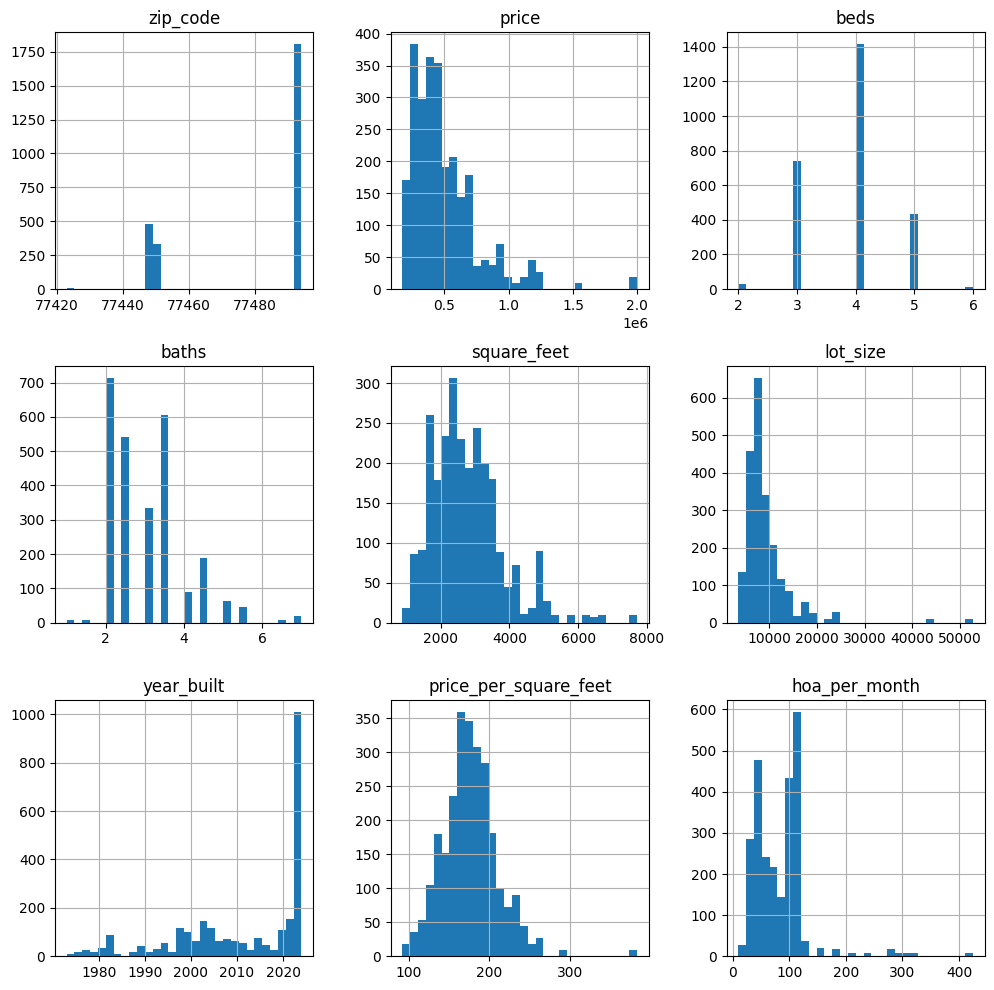

In [8]:
hist = raw_df.hist(
    bins=30, sharey=False, figsize=(12, 12)
)

## Raw Correlations

In [9]:
raw_df.corr(numeric_only=True)

,zip_code,price,beds,baths,square_feet,lot_size,year_built,price_per_square_feet,hoa_per_month
zip_code,1.000000,0.265267,0.238033,0.234966,0.157968,0.190643,0.636173,0.402458,0.330693
price,0.265267,1.000000,0.628895,0.820526,0.893438,0.684974,0.262740,0.682203,0.457583
beds,0.238033,0.628895,1.000000,0.765731,0.712740,0.387055,0.284583,0.211698,0.267776
baths,0.234966,0.820526,0.765731,1.000000,0.855393,0.484546,0.286887,0.398780,0.337439
square_feet,0.157968,0.893438,0.712740,0.855393,1.000000,0.577708,0.155351,0.321714,0.351490
lot_size,0.190643,0.684974,0.387055,0.484546,0.577708,1.000000,0.115816,0.522843,0.267061
year_built,0.636173,0.262740,0.284583,0.286887,0.155351,0.115816,1.000000,0.382641,0.217341
price_per_square_feet,0.402458,0.682203,0.211698,0.398780,0.321714,0.522843,0.382641,1.000000,0.416585
hoa_per_month,0.330693,0.457583,0.267776,0.337439,0.351490,0.267061,0.217341,0.416585,1.000000


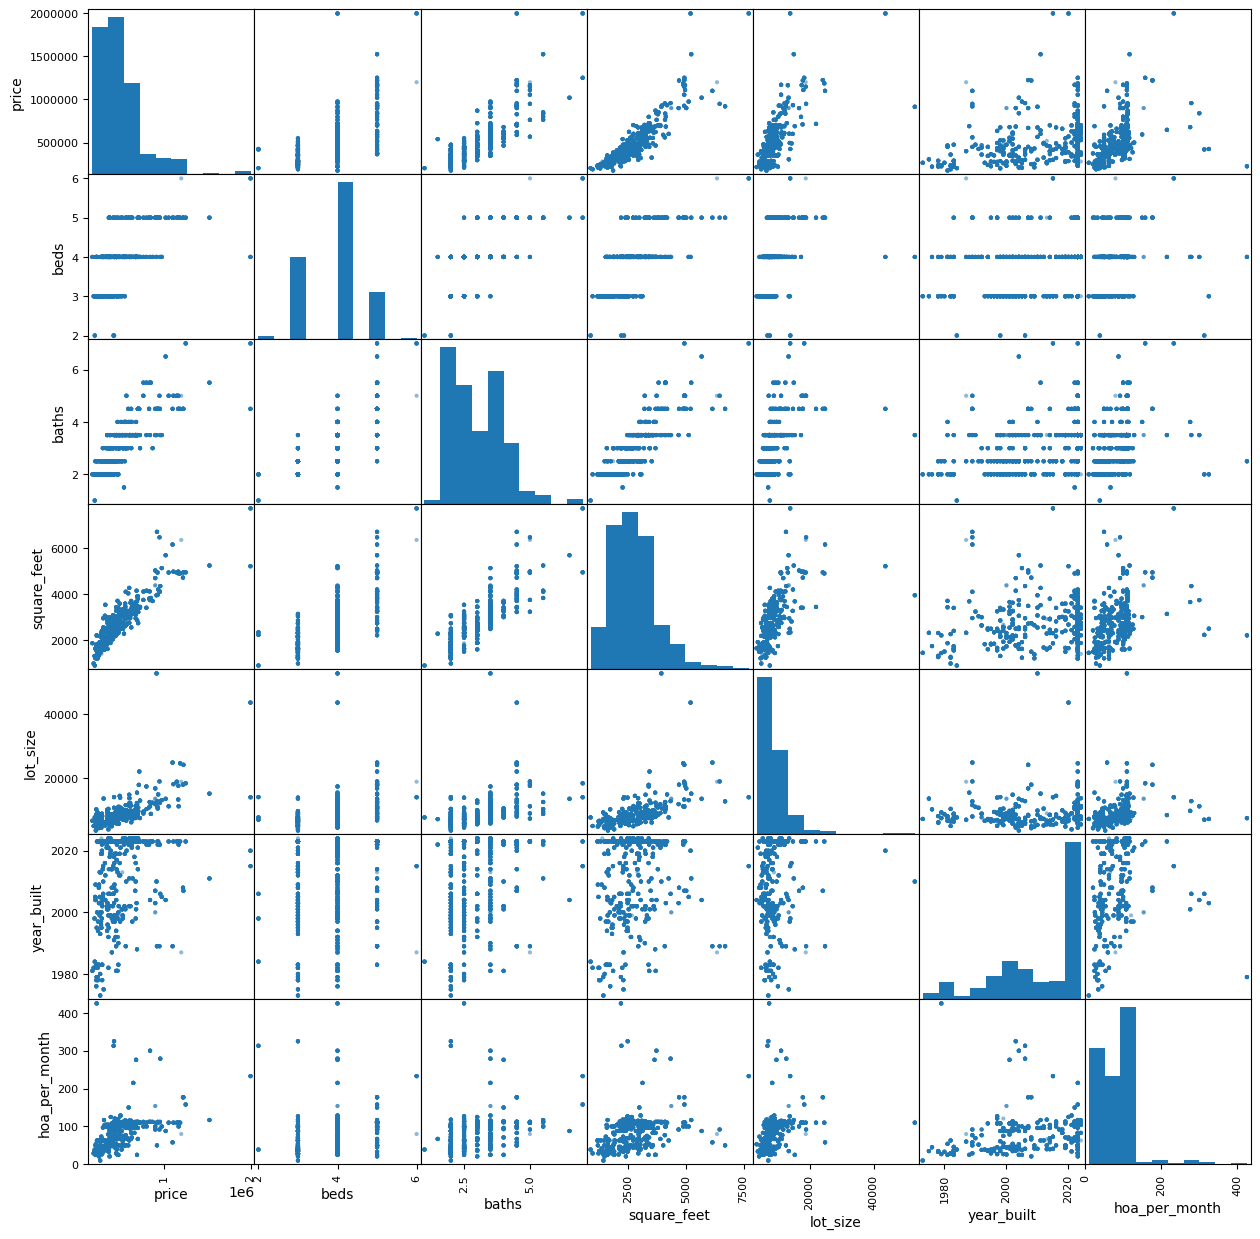

In [11]:
pd.plotting.scatter_matrix(
    raw_df[["price", "beds", "baths", "square_feet", "lot_size", "year_built", "hoa_per_month"]],
    figsize=(15, 15)
)
plt.show()